# N-gram statistics of EHR v. NLP datasets

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
sns.set_context("paper")
sns.set_style('whitegrid', rc={
    'xtick.bottom': True,
    'ytick.left': True,
}) 

What percentage of n-grams are repeated?

In [18]:
def plot_percentage_n_grams_repeated(ax, values, n: int, color: str, label: str = 'patients'):
    ax.hist(values, bins=20, edgecolor='black', color=color)
    ax.set_title(f"# of {label.title()} With a Given {n}-gram Repetition Rate")
    ax.set_ylabel(f"# of {label.title()}")
    ax.set_xlabel(f"{n}-gram Repetition Rate")
tab10_colors = sns.color_palette("tab10")

# NLP

In [5]:
if os.path.exists('n_gram_cache/nlp/df_rr_1.parquet'):
    df_rr_1 = pd.read_parquet('n_gram_cache/nlp/df_rr_1.parquet')
    df_rr_2 = pd.read_parquet('n_gram_cache/nlp/df_rr_2.parquet')
    df_rr_3 = pd.read_parquet('n_gram_cache/nlp/df_rr_3.parquet')
    df_rr_4 = pd.read_parquet('n_gram_cache/nlp/df_rr_4.parquet')
else:
    df1 = pd.read_parquet('/share/pi/nigam/mwornow/hf_ehr/hf_ehr/notebooks/wikitext-103--ngrams--1.parquet')
    df2 = pd.read_parquet('/share/pi/nigam/mwornow/hf_ehr/hf_ehr/notebooks/wikitext-103--ngrams--2.parquet')
    df3 = pd.read_parquet('/share/pi/nigam/mwornow/hf_ehr/hf_ehr/notebooks/wikitext-103--ngrams--3.parquet')
    df4 = pd.read_parquet('/share/pi/nigam/mwornow/hf_ehr/hf_ehr/notebooks/wikitext-103--ngrams--4.parquet')
    df_rr_1 = df1.groupby(['idx',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_1' })
    df_rr_2 = df2.groupby(['idx',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_2' })
    df_rr_3 = df3.groupby(['idx',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_3' })
    df_rr_4 = df4.groupby(['idx',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_4' })
    # cache
    os.makedirs('n_gram_cache/nlp/', exist_ok=True)
    df_rr_1.to_parquet('n_gram_cache/nlp/df_rr_1.parquet', index=False)
    df_rr_2.to_parquet('n_gram_cache/nlp/df_rr_2.parquet', index=False)
    df_rr_3.to_parquet('n_gram_cache/nlp/df_rr_3.parquet', index=False)
    df_rr_4.to_parquet('n_gram_cache/nlp/df_rr_4.parquet', index=False)

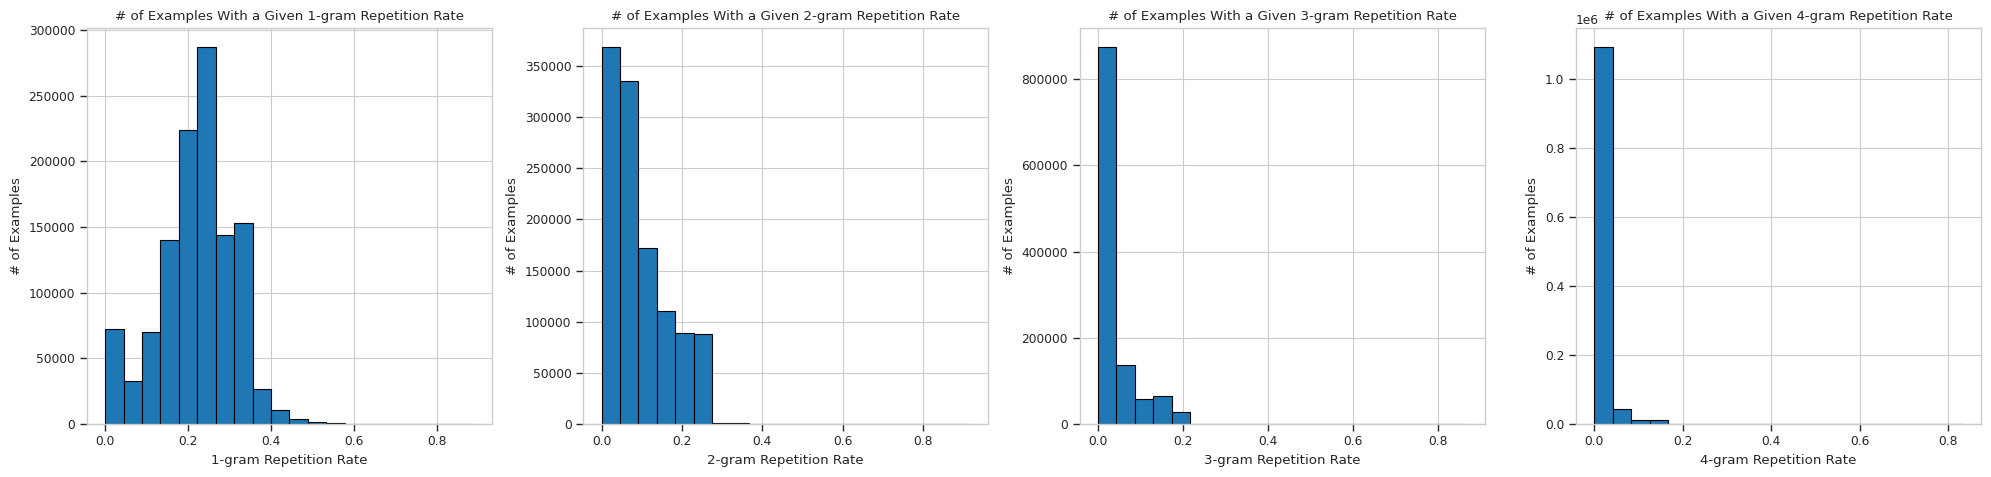

In [19]:
# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes = axes.flatten()  # Flatten the array for easy indexing

# Plot each histogram on its respective subplot
plot_percentage_n_grams_repeated(axes[0], df_rr_1['rr_1'], 1, tab10_colors[0], label='examples')
plot_percentage_n_grams_repeated(axes[1], df_rr_2['rr_2'], 2, tab10_colors[0], label='examples')
plot_percentage_n_grams_repeated(axes[2], df_rr_3['rr_3'], 3, tab10_colors[0], label='examples')
plot_percentage_n_grams_repeated(axes[3], df_rr_4['rr_4'], 4, tab10_colors[0], label='examples')

plt.tight_layout()  # Adjust layout
plt.show()

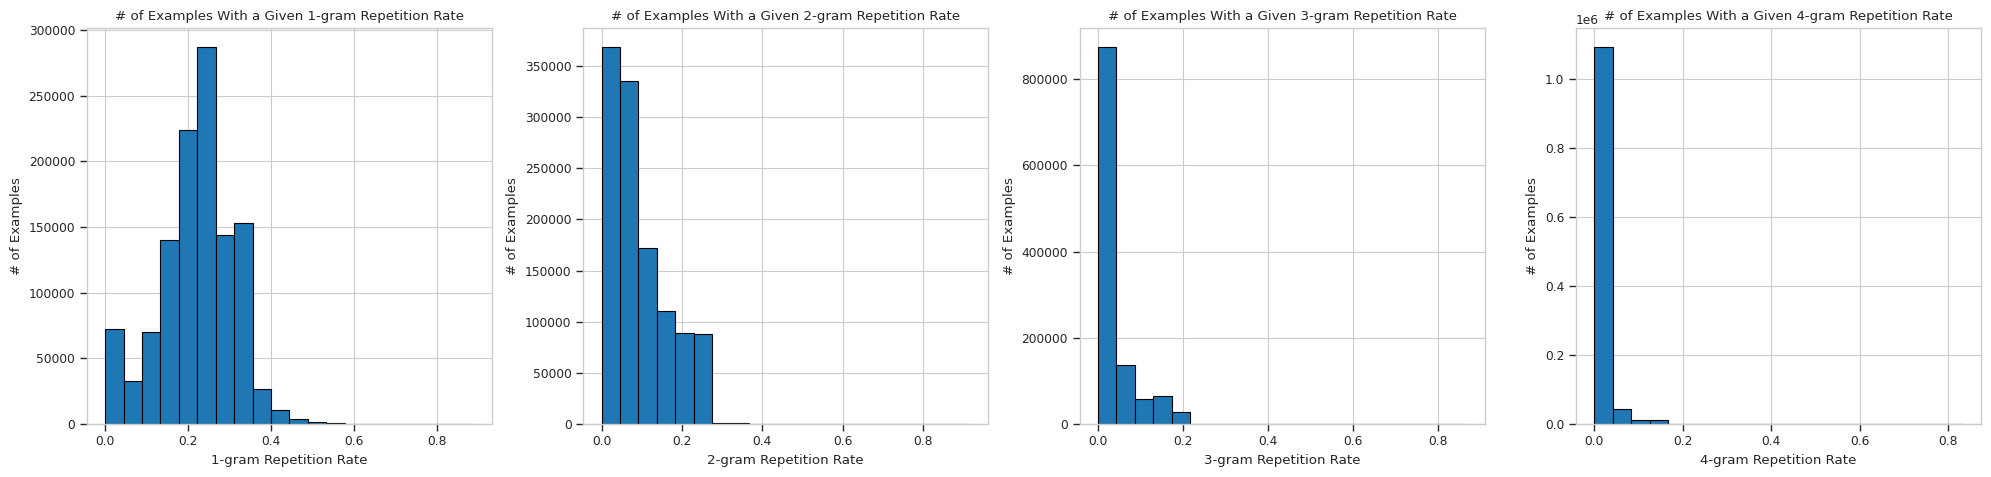

In [ ]:
# Create subplots filtering out examples with < 20 tokens
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes = axes.flatten()  # Flatten the array for easy indexing

# Plot each histogram on its respective subplot
plot_percentage_n_grams_repeated(axes[0], df_rr_1['rr_1'], 1, tab10_colors[0], label='examples')
plot_percentage_n_grams_repeated(axes[1], df_rr_2['rr_2'], 2, tab10_colors[0], label='examples')
plot_percentage_n_grams_repeated(axes[2], df_rr_3['rr_3'], 3, tab10_colors[0], label='examples')
plot_percentage_n_grams_repeated(axes[3], df_rr_4['rr_4'], 4, tab10_colors[0], label='examples')

plt.tight_layout()  # Adjust layout
plt.show()

# EHR

In [23]:
if os.path.exists('n_gram_cache/ehr/df_rr_1_ehr.parquet'):
    df_rr_1_ehr = pd.read_parquet('n_gram_cache/ehr/df_rr_1.parquet')
    df_rr_2_ehr = pd.read_parquet('n_gram_cache/ehr/df_rr_2.parquet')
    df_rr_3_ehr = pd.read_parquet('n_gram_cache/ehr/df_rr_3.parquet')
    df_rr_4_ehr = pd.read_parquet('n_gram_cache/ehr/df_rr_4.parquet')
else:
    df = pd.read_parquet('/share/pi/nigam/mwornow/ehrshot-benchmark/ehrshot/eda/df__starr__n_gram_counts.parquet')
    df1_ehr = df[df['n'] == 1]
    df2_ehr = df[df['n'] == 2]
    df3_ehr = df[df['n'] == 3]
    df4_ehr = df[df['n'] == 4]
    df_rr_1_ehr = df1_ehr.groupby(['pid',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_1' })
    df_rr_2_ehr = df2_ehr.groupby(['pid',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_2' })
    df_rr_3_ehr = df3_ehr.groupby(['pid',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_3' })
    df_rr_4_ehr = df4_ehr.groupby(['pid',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_4' })
    # cache
    os.makedirs('n_gram_cache/ehr/', exist_ok=True)
    df_rr_1_ehr.to_parquet('n_gram_cache/ehr/df_rr_1_ehr.parquet', index=False)
    df_rr_2_ehr.to_parquet('n_gram_cache/ehr/df_rr_2_ehr.parquet', index=False)
    df_rr_3_ehr.to_parquet('n_gram_cache/ehr/df_rr_3_ehr.parquet', index=False)
    df_rr_4_ehr.to_parquet('n_gram_cache/ehr/df_rr_4_ehr.parquet', index=False)
    

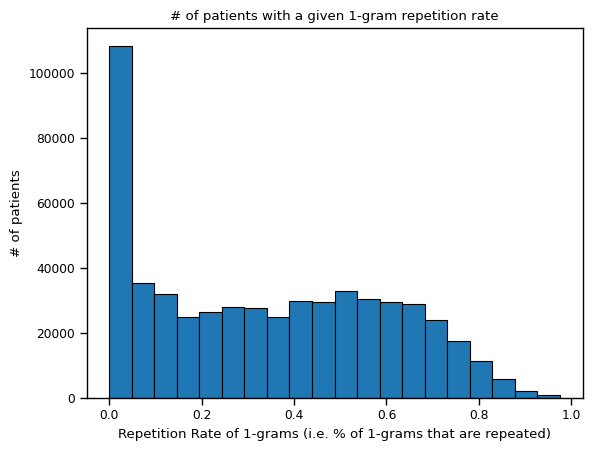

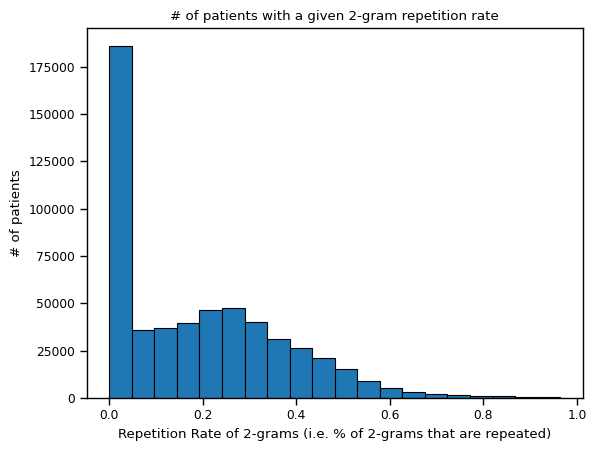

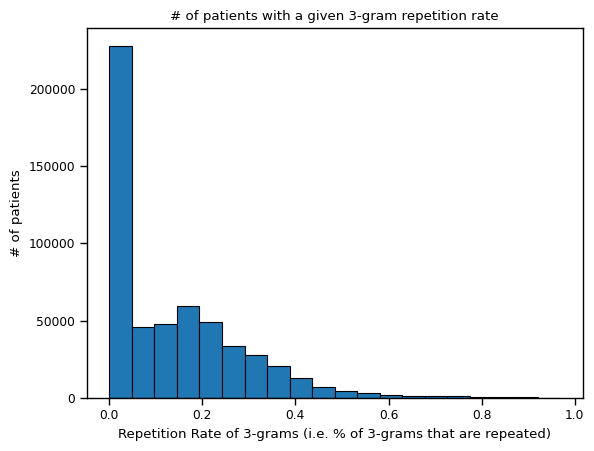

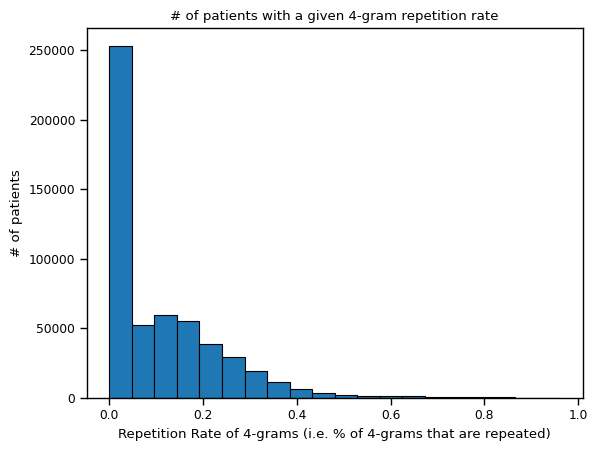

In [10]:
# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes = axes.flatten()  # Flatten the array for easy indexing

# Plot each histogram on its respective subplot
plot_percentage_n_grams_repeated(axes[0], df_rr_1_ehr['rr_1'], 1, tab10_colors[0])
plot_percentage_n_grams_repeated(axes[1], df_rr_2_ehr['rr_2'], 2, tab10_colors[0])
plot_percentage_n_grams_repeated(axes[2], df_rr_3_ehr['rr_3'], 3, tab10_colors[0])
plot_percentage_n_grams_repeated(axes[3], df_rr_4_ehr['rr_4'], 4, tab10_colors[0])

plt.tight_layout()  # Adjust layout
plt.show()